# Project 2

Please remembed to download your submitted notebook both as `.ipynb` and `.html`.

In the following exercise, we will perform exploratory data analysis (EDA) to extract insights using Python. This assignment continues off of the previous assignment (Project 1). If you wish, you may copy and paste your previous code into this notebook.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [1]:
# %%capture
# !pip install penngrader --user
# !pip install seaborn --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [2]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 57896367                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Emmanuel Murerwa"     # YOUR FULL NAME GOES HERE

In [3]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE305_FA_2021_HW2', student_id = STUDENT_ID)

In [4]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import seaborn as sns

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Part A

First, we return to the College dataset. This dataset contains the following variables from 777 different universities and colleges in the US:

| Column | Description | 
|:-|:-|
|Private | Public/private indicator|
|Apps | Number of applications received|
|Accept | Number of applicants accepted|
|Enroll | Number of new students enrolled|
|Top10perc | New students from top 10\% of high school class|
|Top25perc | New students from top 25\% of high school class|
|F.Undergrad | Number of full-time undergraduates|
|P.Undergrad | Number of part-time undergraduates|
|Outstate | Out-of-state tuition|
|Room.Board | Room and board costs|
|Books | Estimated book costs|
|Personal | Estimated personal spending|
|PhD | Percent of faculty with Ph.D.’s|
|Terminal | Percent of faculty with terminal degree|
|S.F.Ratio | Student/faculty ratio|
|Perc.alumni | Percent of alumni who donate|
|Expend | Instructional expenditure per student|
|Grad.Rate | Graduation rate|

In [5]:
college = pd.read_csv('College.csv').copy()
college = college.rename(columns = {'Grad.Rate':'Grad_Rate',
                              'S.F.Ratio': 'S_F_Ratio',
                              'perc.alumni':'perc_alumni',
                              'Room.Board':'Room_Board',
                              'F.Undergrad':'F_Undergrad',
                              'P.Undergrad':'P_Undergrad'})

In [6]:
college.set_index('Names', inplace = True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


1. Use the `seaborn` `pairplot()` function on the original dataframe with all universities to produce a scatterplot matrix of the ﬁrst ten columns of the data. Remember to use the `%matplotlib` inline command for plotting in Jupyter. Comment on your observations.

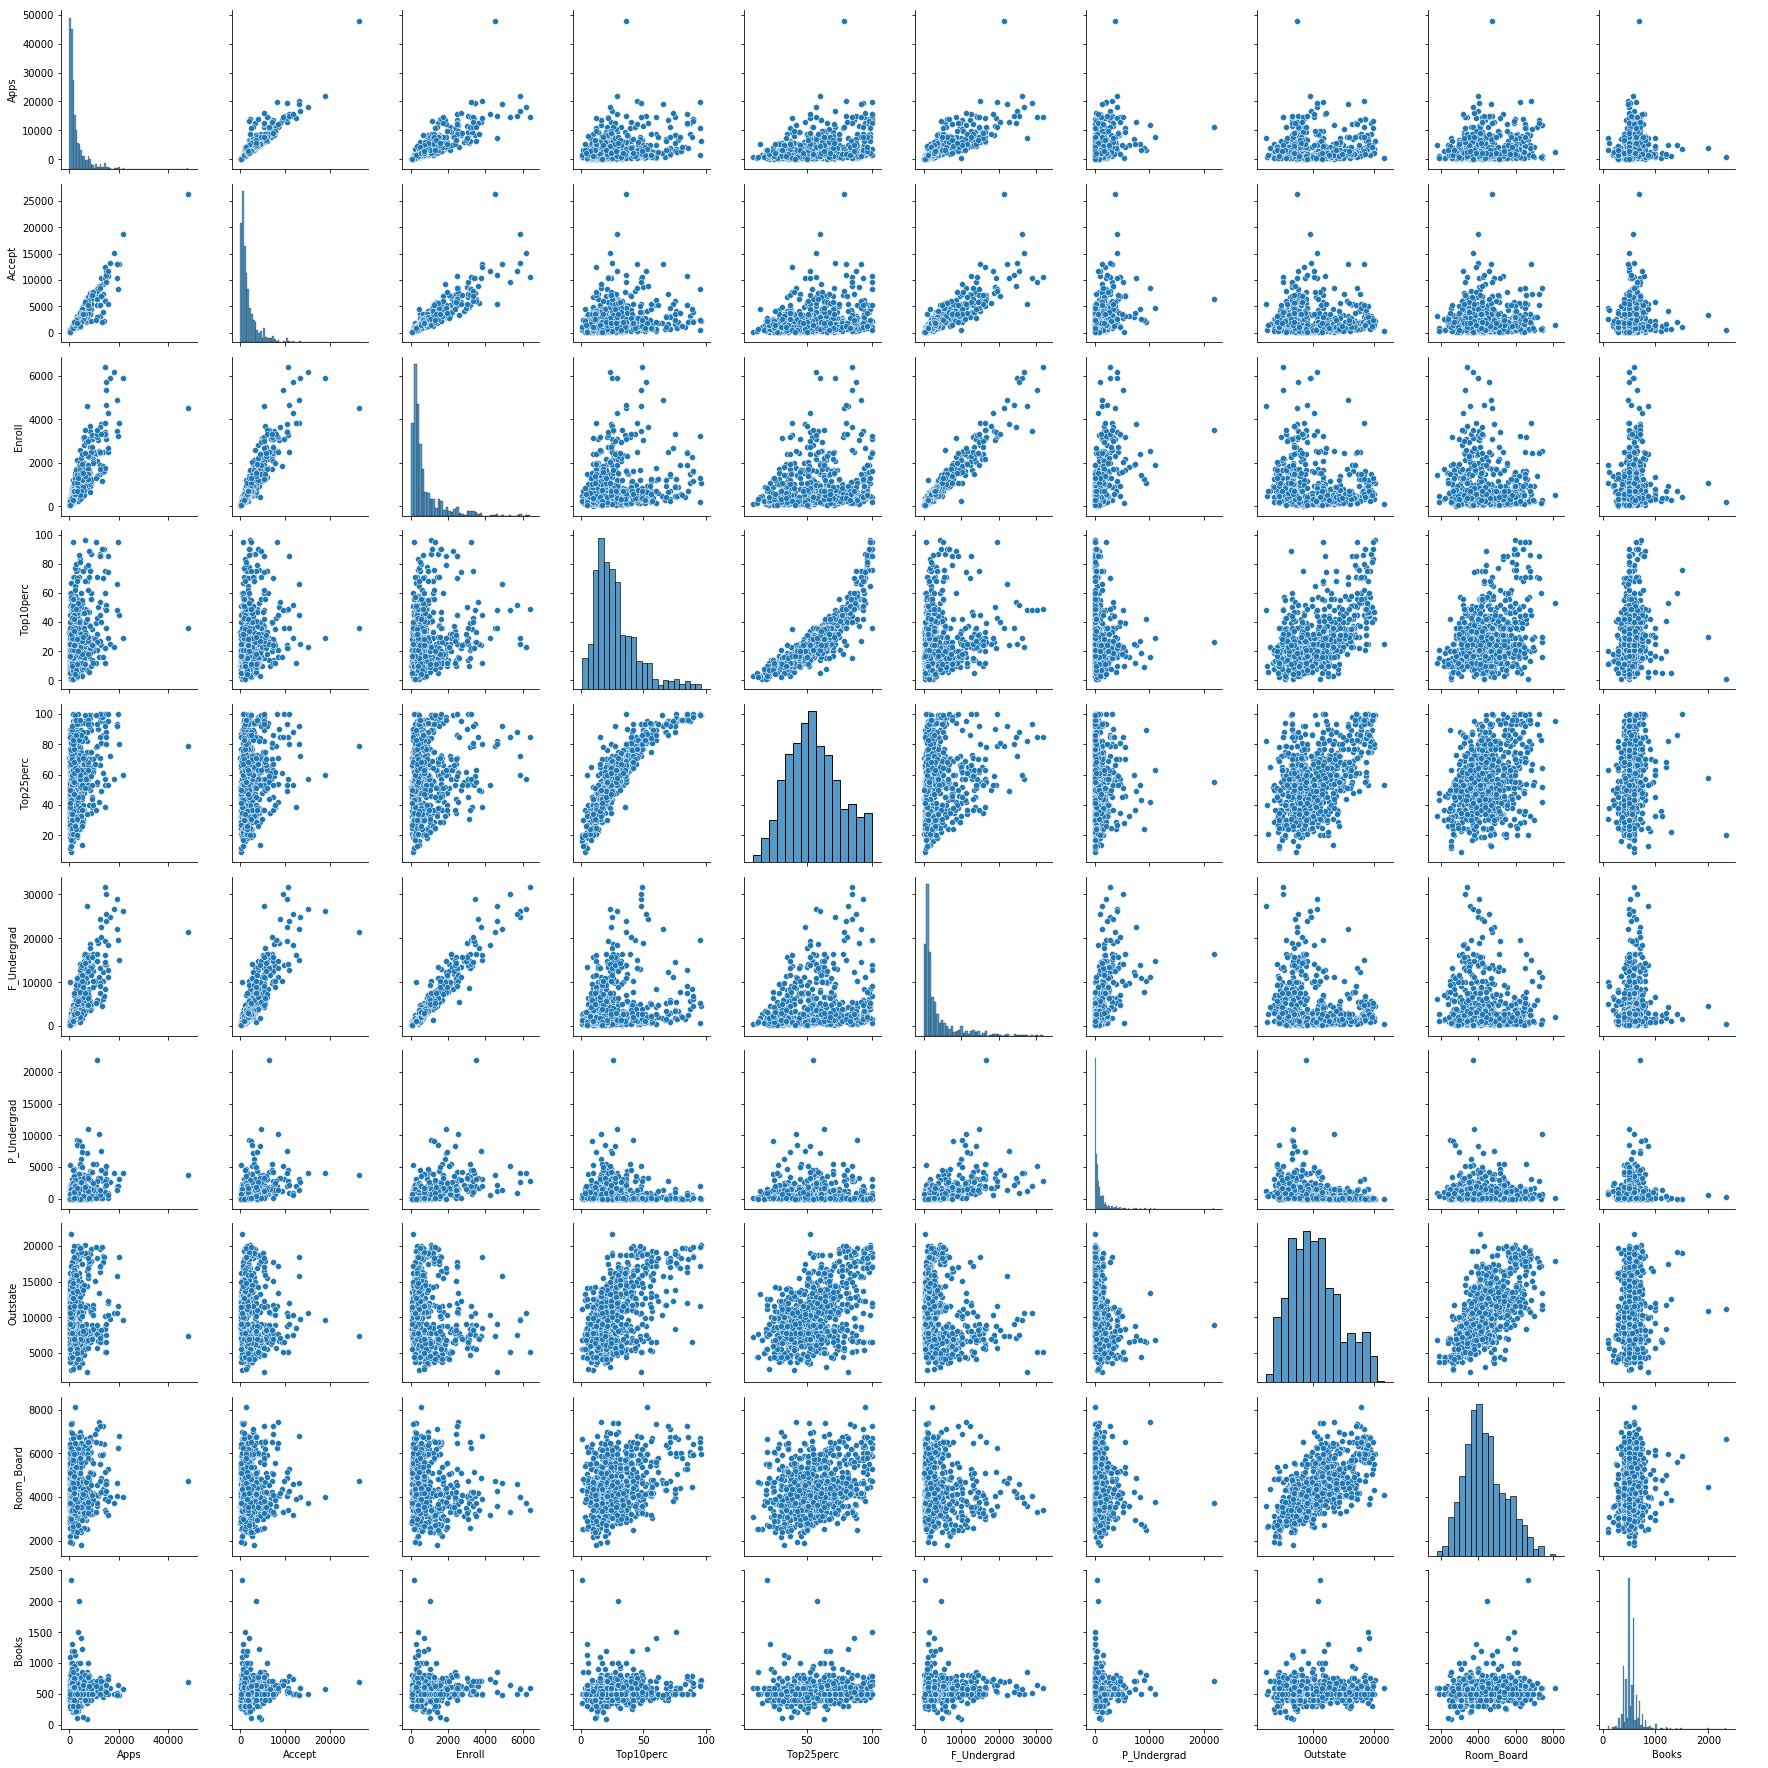

In [7]:
sns.pairplot(college.iloc[:, 0:11])
plt.show()

In [8]:
#There is a general positive correlation in the first columns but it reduces as the columns increase to 10.

2. Use the `seaborn` `boxplot()` function on the original dataframe with all universities to produce side-by-side box plots of ‘Outstate’ versus ‘Private’. 

Text(0, 0.5, 'Out-of-state tuition (dollars)')

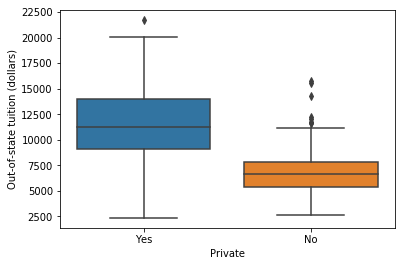

In [9]:
sns.boxplot(x = college['Private'],y = college['Outstate']);
plt.ylabel('Out-of-state tuition (dollars)')

3. Create a new qualitative variable named `large_university` by binning the ‘Enroll’ column. We are going to divide universities into two groups based on whether the number of new students enrolled exceeds the average (mean) of all new students enrolled.  Hint: The variable `large_university` is an indicator variable (a Pandas series that represents a series of booleans, a list is also acceptable). In Python, this is called a "mask," which you can later manipulate to slice your data.

In [42]:
college['large_university'] = False
college.loc[college['Enroll'] > college['Enroll'].mean(), 'large_university'] = True
large_university = college['large_university']

In [43]:
grader.grade(test_case_id = 'large_university_bin_test', answer = large_university)

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Create a dataframe called `large_universities` that only includes large universities.

In [44]:
large_universities = college[['large_university']]
large_universities.head()

,large_university
Names,
Abilene Christian University,False
Adelphi University,False
Adrian College,False
Agnes Scott College,False
Alaska Pacific University,False


5. Use the `pandas` `describe(include = ‘all’)` function on large_universities to produce a numerical summary of each column. Within this dataframe, what is the $75^{th}$ percentile for the column ‘Enroll’? <b>Name this variable `enroll_answer`</b>

In [45]:
college.groupby(by = college['large_university']).describe(include = 'all')

Private                                                 ...  \
                   count unique  top freq mean  std  min  25%  50%  75%  ...   
large_university                                                         ...   
False                559      2  Yes  498  NaN  NaN  NaN  NaN  NaN  NaN  ...   
True                 218      2   No  151  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                 Grad_Rate                                                   \
                    unique top freq       mean        std   min   25%   50%   
large_university                                                              
False                  NaN NaN  NaN  66.048301  16.717004  15.0  54.0  67.0   
True                   NaN NaN  NaN  63.963303  18.260494  10.0  52.0  63.5   

                               
                   75%    max  
large_university               
False             79.0  118.0  
True              75.0  100.0  

[2 rows x 198 columns]

In [46]:
enroll_answer = college['Enroll'].groupby(by = college['large_university']).describe().loc[True, '75%']  

In [47]:
grader.grade(test_case_id = 'enroll_test', answer = enroll_answer)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Use the `seaborn` `boxplot()` function on the large_university variable to determine whether larger universities are more expensive.

Text(0, 0.5, 'Out-of-state tuition (dollars)')

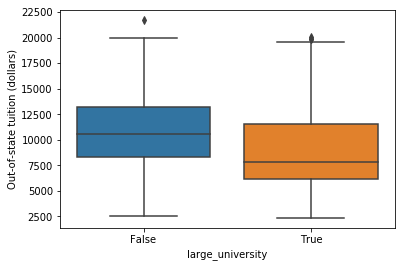

In [48]:
sns.boxplot(x = college['large_university'],y = college['Outstate']);
plt.ylabel('Out-of-state tuition (dollars)')

7. To further examine the relationship between the size of a university against its out-of-state tuition, plot a scatter plot. Hint: Use the enrollment class size as a proxy for the size of a university.

Text(-8.950000000000003, 0.5, 'Out-of-state tuition (dollars)')

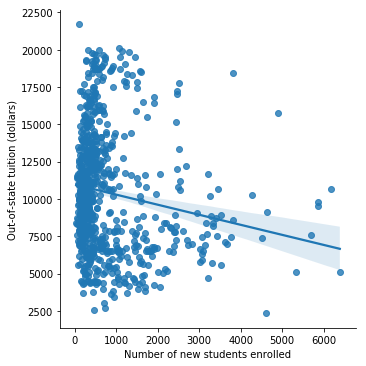

In [49]:
sns.lmplot(x = 'Enroll', y = 'Outstate', data = college)
plt.xlabel('Number of new students enrolled')
plt.ylabel('Out-of-state tuition (dollars)')

8. Use `matplotlib.pyplot.hist()` or `seaborn.distplot()` to produce some histograms with different numbers of bins for a few of the quantitative variables. You may ﬁnd the `matplotlib.pyplot.subplot()` function useful to plot multiple graphs under a single codeblock. In particular, create a histogram to examine the number of applications received with a bin size of 200.

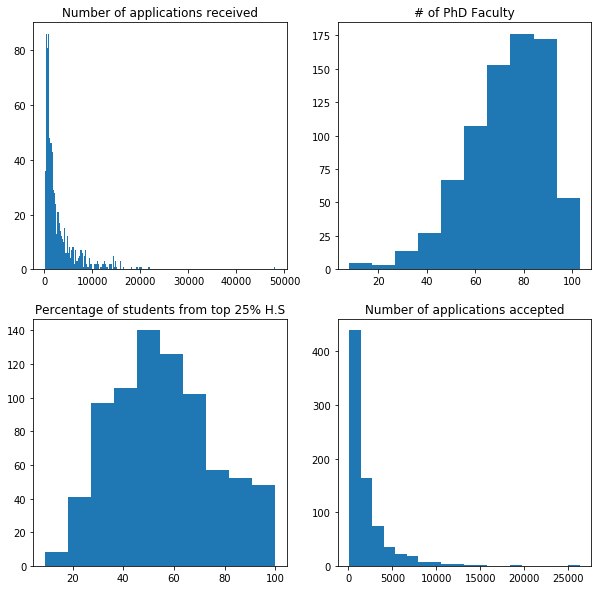

In [50]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.hist(college['Apps'],bins=200);
plt.title('Number of applications received');

plt.subplot(2,2,2)
plt.hist(college['PhD']);
plt.title('# of PhD Faculty');

plt.subplot(2,2,3);
plt.hist(college['Top25perc']);
plt.title('Percentage of students from top 25% H.S');

plt.subplot(2,2,4);
plt.hist(college['Accept'],bins = 20);
plt.title('Number of applications accepted');

9. We are interested in the acceptance rate of these universities. To calculate the acceptance rate, we take the ‘Accept’ column and divide by the ‘Apps’ column. Add this column to a copied version of the original dataframe. Remember to copy the dataframe first before performing feature transformation, as we do not wish to alter or inadvertently create new columns in our original data. <b>Name your new column `acceptance_rate`. </b>

In [51]:
college_new = college.copy() #use copy() to assign to a new variable
acceptance_rate = college_new['Accept'] / college_new['Apps']
college_new['Acceptance_Rate'] = acceptance_rate
college_new.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university,Acceptance_Rate
Names,,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False,0.742169
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False,0.880146
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False,0.768207
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,False,0.836930
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False,0.756477


In [52]:
grader.grade(test_case_id = 'acceptance_rate_test', answer = acceptance_rate)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


*You may plot the university’s acceptance rate vs the percentage of students in the university who graduated from the top 10% from high school.*

Text(6.799999999999997, 0.5, 'University acceptance rate')

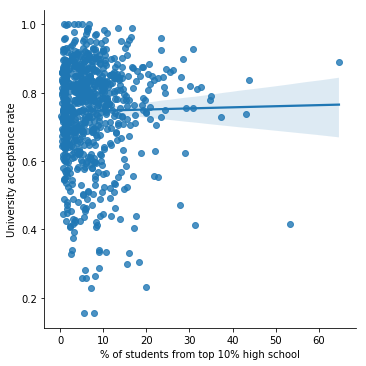

In [53]:
top10_acceptance_rate = (college_new['Top10perc'] / college_new['Enroll'])*100
college_new['Top10_Acceptance_Rate'] = top10_acceptance_rate
sns.lmplot(x = 'Top10_Acceptance_Rate', y = 'Acceptance_Rate', data = college_new)
plt.xlabel('% of students from top 10% high school')
plt.ylabel('University acceptance rate')

10. Continue exploring the data and provide a brief summary of what you discover.

Text(0, 0.5, 'Graduation Rate')

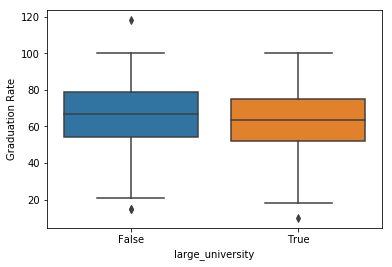

In [54]:
sns.boxplot(x = college['large_university'],y = college['Grad_Rate']);
plt.ylabel('Graduation Rate')

Text(0, 0.5, 'Graduation Rate')

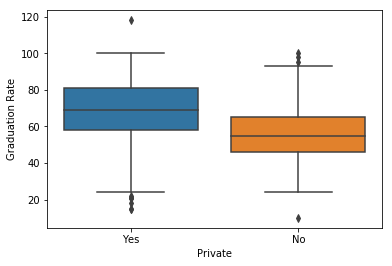

In [55]:
sns.boxplot(x = college['Private'],y = college['Grad_Rate']);
plt.ylabel('Graduation Rate')

In [56]:
#Private universities have a larger graduation rate and also small universities have a larger
#graduation rate, showing that most most universities are private universities.

## Part B

Next, let’s turn to the Boston housing dataset, which contains the following variables from 506 different towns in Boston collected by the US Census Service:

|Column |Description|
|:-|:-|
|CRIM | per capita crime rate by town|
|ZN | proportion of residential land zoned for lots over 25,000 sq.ft|
|INDUS | proportion of non-retail business acres per town|
|CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX | nitric oxides concentration (parts per 10 million)|
|RM | average number of rooms per dwelling|
|AGE | proportion of owner-occupied units built prior to 1940|
|DIS | weighted distances to five Boston employment centres|
|RAD | index of accessibility to radial highways|
|TAX | full-value property-tax rate per \$10,000|
|PTRATIO | pupil-teacher ratio by town|
|B | $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of African Americans by town|
|LSTAT | \% lower status of the population|
|MEDV | Median value of owner-occupied homes in \$1000's|

1. To begin, load the Boston dataset. We can fetch this dataset by calling sklearn’s API.

In [57]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = pd.Series(boston_dataset.target)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


2. Make pairwise scatterplots of some predictors (columns) in this dataset. Since this dataset includes many predictors, avoid using the `seaborn` `pairplot()` function with all the predictors to minimize run-time. Comment on your observations. 

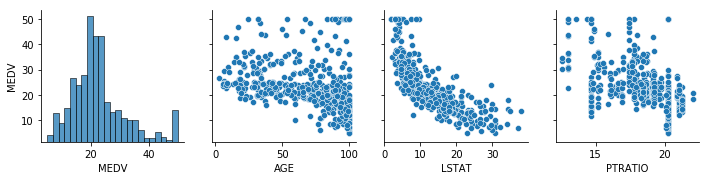

In [87]:
sns.pairplot(boston, x_vars = ['MEDV','AGE', 'LSTAT', 'PTRATIO'], y_vars = ['MEDV'])

In [75]:
#higher median home values have a greater proportion of lower-status residence,
#low pupil teacher ratio and higher proportion of African Americans.

3. Are any of the predictors associated with per capita crime rate?  If so, explain the relationship. 

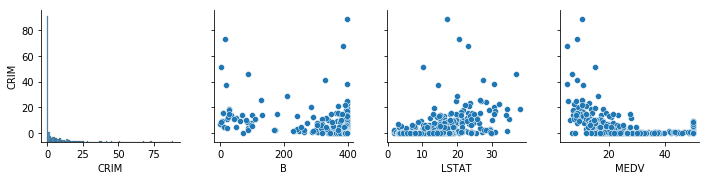

In [90]:
sns.pairplot(boston, x_vars = ['CRIM','B', 'LSTAT', 'MEDV'], y_vars = ['CRIM'])

In [91]:
#Homes valued lower, areas with high proportion of lower status residents have higher crime
#rate. There is no clear relationship between proportion of African American population in a 
#town and the crime rate.

4. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. Hint: Name the variables `highest_crim`, `lowest_tax`, and `highest_pup` respectively. If there are multiple towns that share the same value, choose the first observation.

In [92]:
highest_crim = boston.index[boston['CRIM'] == boston['CRIM'].max()]

In [93]:
grader.grade(test_case_id = 'highest_crim_test', answer = highest_crim)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [94]:
lowest_tax = boston.index[boston['TAX'] == boston['TAX'].min()]

In [95]:
grader.grade(test_case_id = 'lowest_tax_test', answer = lowest_tax)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [96]:
highest_pup = boston.index[boston['PTRATIO'] == boston['PTRATIO'].max()]
highest_pup = highest_pup[0]

In [97]:
grader.grade(test_case_id = 'highest_pup_test', answer = highest_pup)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Count the number of towns in this dataset that are bound to the Charles river and name this number as the variable `charles`. 

In [102]:
charles = boston['CHAS'].sum()
print("There are %s towns bound to the Charles River and %s that are not." % (charles, 506-charles))

There are 35.0 towns bound to the Charles River and 471.0 that are not.


In [103]:
grader.grade(test_case_id = 'charles_test', answer = charles)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. What is the median pupil-teacher ratio among the towns in this dataset? Name this number as the variable `med_pt`.

In [104]:
med_pt = boston['PTRATIO'].describe().loc['50%']
print("The median pupil-to-teacher ratio is %s." % med_pt)

The median pupil-to-teacher ratio is 19.05.


In [105]:
grader.grade(test_case_id = 'med_pt_test', answer = med_pt)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


7. Which town of Boston has lowest median value of owner- occupied homes? Name this index as the variable `min_medv`. If there are multiple towns with the same minimum median value, then choose the first such observation. What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your observations.

In [106]:
min_medv = boston.index[boston['MEDV'] == boston['MEDV'].min()]
min_medv = min_medv[0]
print("The lowest median value of owner- occupied homes is town #%s." % min_medv)
boston.iloc[[min_medv]]

The lowest median value of owner- occupied homes is town #398.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0


In [107]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [108]:
grader.grade(test_case_id = 'min_medv_test', answer = min_medv)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


8. In this data set, how many of the suburbs average more than eight rooms per dwelling? Name this number as the variable `num_rooms`. Comment on the suburbs that average more than eight rooms per dwelling.

In [109]:
num_rooms = len(boston.index[boston['RM'] > 8])
boston[boston['RM'] > 8].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [129]:
grader.grade(test_case_id = 'num_rooms_test', answer = num_rooms)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


*What other observations can you make from this dataset?*

In [110]:
#suburbs which average more than eight rooms per dwelling have 
#low concentrations of nitric oxides, low crime rates and low proportions of Black residents
#compared to the overall data set.

## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.